In [33]:
# import dependencies

import numpy as np 
import cv2

In [ ]:
# upload image file

from google.colab import files
files.upload()

In [35]:
# read image file

img = cv2.imread('/content/org_image.png')

In [36]:
# check the shape

img.shape

(599, 458, 3)

In [37]:
# reshape the image

img2 = img.reshape((-1,3))

In [38]:
img2.shape

(274342, 3)

## k-means clustering

In [39]:
# documentation link : https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html
# change the data type

X = np.float32(img2)

In [40]:
# define criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# number of clusters (k)
k = 6

# apply kmeans()
ret,label,center = cv2.kmeans(X,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS) # attempts = 10 

In [41]:
# convert back into uint8, and make original image

center = np.uint8(center)
reconstracted_img = center[label.flatten()]
reconstracted_img_2 = reconstracted_img.reshape((img.shape))

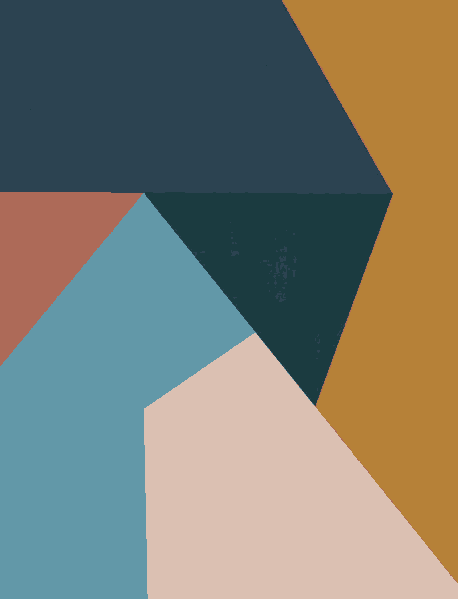

In [42]:
from google.colab.patches import cv2_imshow

cv2_imshow(reconstracted_img_2)

In [43]:
cv2.imwrite("segmented_k_mean.jpg", reconstracted_img_2)

True

In [44]:
print(center)

[[ 88 106 173]
 [168 152  98]
 [ 81  67  44]
 [ 56 129 182]
 [ 64  59  27]
 [178 192 219]]


## Gaussian Mixture Model (GMM)

In [45]:
# import dependencies

from sklearn.mixture import GaussianMixture as GMM

In [46]:
# define an instance and fit the model

gmm_model = GMM(n_components = 6, covariance_type = 'tied').fit(img2)

In [47]:
# make prediction

prediction = gmm_model.predict(img2)

In [48]:
prediction[:100]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
# reconstract the image
prediction_ = prediction*12  # to make the image visible
reconstracted_img_gmm = prediction_.reshape(img.shape[0], img.shape[1])

In [50]:
# save new file
cv2.imwrite("segmented_k_gmm.jpg", reconstracted_img_gmm)

True

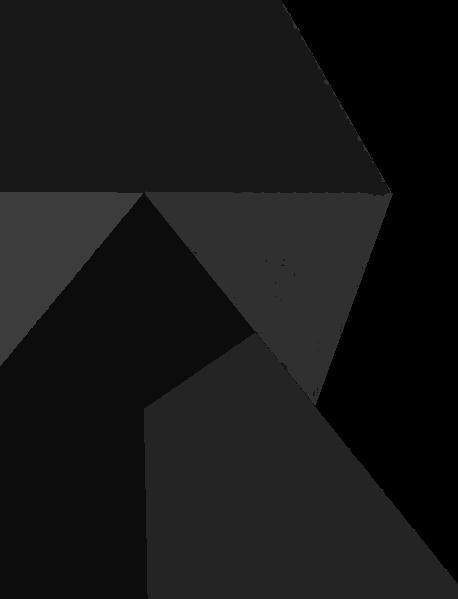

In [51]:
from google.colab.patches import cv2_imshow

cv2_imshow(reconstracted_img_gmm)

## Pick optimal number with BIC/AIC

In [52]:
# calculate BIC for GMM model

n = 2
gmm_model = GMM(n, covariance_type='tied').fit(img2)

bic_values = gmm_model.bic(img2)
print(bic_values)

7223393.509782243


In [53]:
# iterate value of n from 1 to 15

n_components = np.arange(1,15)

gmm_models = [GMM(n, covariance_type='tied').fit(img2) for n in n_components]

Text(0, 0.5, 'BIC_values')

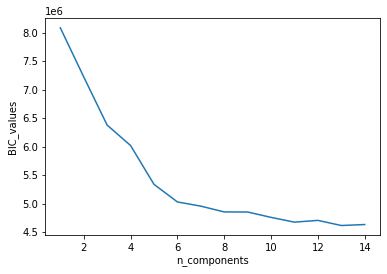

In [54]:
# plot BIC value for every value of n

from matplotlib import pyplot as plt
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label='BIC')
plt.xlabel('n_components')
plt.ylabel('BIC_values')

after n=6 the graph is almost asymptotic. so n= 6 is the correct value.

Text(0, 0.5, 'AIC_values')

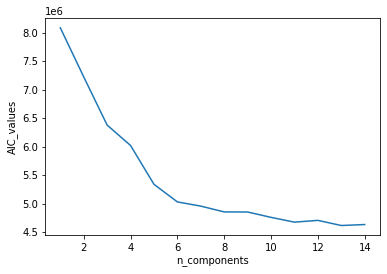

In [55]:
# plot AIC

plt.plot(n_components, [m.aic(img2) for m in gmm_models], label='AIC')
plt.xlabel('n_components')
plt.ylabel('AIC_values')

## Image Segmentation with Histogram

Try two different ways.

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        3.00000e+00, 3.00000e+00, 2.00000e+00, 7.00000e+00, 4.00000e+00,
        1.50000e+01, 1.30000e+01, 1.90000e+01, 2.70000e+01, 3.10000e+01,
        4.00000e+01, 7.50000e+01, 7.80000e+01, 2.33000e+02, 1.47000e+02,
        3.34100e+03, 1.12900e+04, 3.08800e+03, 3.79600e+03, 1.49700e+03,
        6.54000e+02, 4.05000e+02, 3.38000e+02, 1.26000e+02, 2.67000e+02,
        2.54000e+02, 2.52000e+02, 1.51000e+02, 1.64000e+02, 2.85000e+02,
        3.61000e+02, 1.34600e+03, 1.53900e+03, 3.40000e+04, 1.25560e+04,
        5.79900e+03, 2.91600e+03, 2.27000e+02, 1.78900e+03, 1.34000e+03,
        1.16800e+03, 1.46400e+03, 4.50300e+03, 1.53700e+03, 1.04310e+04,
        4.19300e+03, 1.93500e+04, 7.09300e+03, 8.92400e+03, 5.97400e+03,
        1.40630e+04, 3.58300e+03, 1.79600e+03, 5.71100e+03, 1.64960e+04,
        4.07900e+03, 3.55560e+04, 1.42260e+04, 6.90

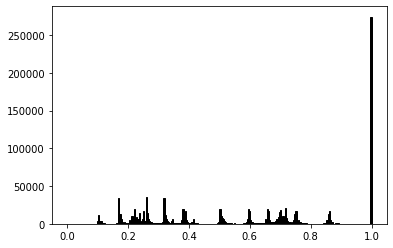

In [56]:
# with matplotlib
# import library
import matplotlib.pyplot as plt

# read image
img = plt.imread('/content/org_image.png')

#calculating histogram
plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

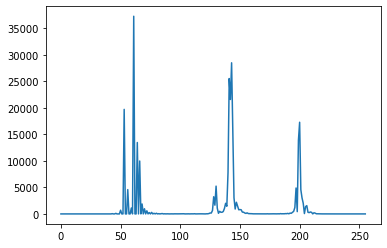

In [57]:
# with openCV
# import library
import cv2

# load an image in grayscale mode
img = cv2.imread('/content/org_image.png',0)
  
# calculate frequency of pixels in range 0-255
histg = cv2.calcHist([img],[0],None,[256],[0,256]) 

# show the plotting graph of an image
plt.plot(histg)
plt.show()

Work on the main image

In [58]:
# load an image in grayscale mode
img = cv2.imread('/content/org_image.png',0)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 7.0000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.9719e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

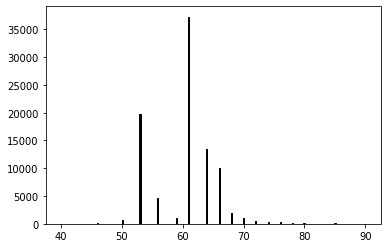

In [59]:
#calculating histogram
plt.hist(img.ravel(), bins=256, range=(40.0, 90.0), fc='k', ec='k')

In [60]:
# segmentations

seg_1 = (img <= 57)
seg_2 = (img > 57) & (img <= 100)
seg_3 = (img > 100) & (img <= 135)
seg_4 = (img > 135) & (img<= 160)
seg_5 = (img > 160)

In [61]:
img.shape

(599, 458)

In [62]:
# creat the segmented image
import numpy as np

all_segments_tog = np.zeros((img.shape[0], img.shape[1], 3))

In [63]:
# color the segments

all_segments_tog[seg_1] = (1,0,0)
all_segments_tog[seg_2] = (0,1,0)
all_segments_tog[seg_3] = (0,0,1)
all_segments_tog[seg_4] = (1,1,0)
all_segments_tog[seg_5] = (0,1,1)

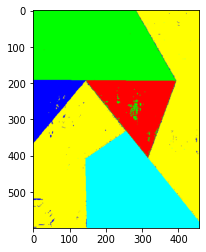

In [64]:
plt.imshow(all_segments_tog)

The segmentation is not neat because the selection of threshold is not perfect.